In [15]:
from pynq import Overlay

In [16]:
ol = Overlay("hw/top.bit", download=True)

In [17]:
from pynq import allocate
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dma_recv = ol.dma.recvchannel

In [31]:
frame_size = 32768
buffer = allocate(shape=(frame_size,), dtype=np.uint64)
ol.gpio_trig_capture.channel1[0].on()
dma_recv.transfer(buffer)
ol.gpio_trig_capture.channel1[0].off()
for i in range(10):
    print('0x' + format(buffer[i], '02x'))

0x44f9fca9b57e8805
0x18645aa57dba7591
0x979380089463cdbf
0x7eb25eb51e25d337
0xb0f0f6c7401c731d
0xf3d8ae7e852c8618
0x60aa7f1571cc3d5f
0x8025996cd5fd2131
0x5867157ecae092b7
0xffcd479976c67d24


In [30]:
ol.gpio_dds_pinc.channel1.write(500*3178, 0xffffff)

In [36]:
flattened = np.zeros(shape=(frame_size*4,))
for i in range(frame_size):
    for j in range(4):
        val = (int(buffer[i]) >> (16*j)) & 0xffff
        if (val & 0x8000):
            val -= 0x10000
        flattened[4*i+j] = val

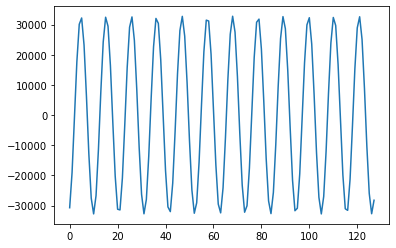

In [38]:
plt.plot(flattened[:128])

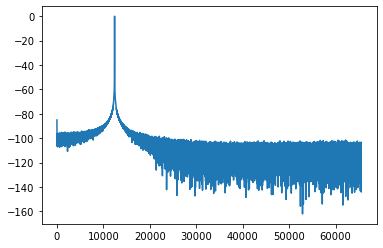

In [34]:
fft = 20*np.log10(abs(np.fft.rfft(flattened)))
fft -= np.max(fft)
plt.plot(fft)